<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/09%20-%20Regression%201/Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> WALKTHROUGH 7</h1>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

Regression is to relate input variables to the output variable, to either predict outputs for new inputs and/or to understand the effect of the input on the output.

In prediction, we wish to predict the output for a new input vector.

In interpretation, we wish to understand the effect of inputs on output.

For both goals, we need to find a function that approximates the output “well enough” given some inputs:

$$y_n =f(\boldsymbol{x_{n}})$$

In python, a useful library exists to apply regression and other Machine Learning and statisticals tools over the data. It is the so called **sklearn**.

This walkthrough will teach you how to use this library in the context of regression.

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
%matplotlib inline

## 1. Load the dataset


From this library we import the `LinearRegression` module and the different datasets used for our examples. In this section, we will discuss the basics of using the linear model with the weather dataset as example. Then you will be given a task and perform your own linear regression.

In [2]:
#Load the dataset
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/weather.csv"
weather = pd.read_csv(url).drop_duplicates().dropna()

# Display a sample of the data
display(weather.head())

# Print the data types
print(weather.dtypes)
print("Data matrix shape: ", weather.shape)

# Display the columns names
print("Columns names: ", weather.columns)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object
Data matrix shape:  (328, 24)
Columns names:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'R

In [3]:
# Display correlation of the features for numeric_only features
display(weather.corr(numeric_only=True))
display(weather.corrwith(weather['Temp3pm'], numeric_only=True))

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.745911,0.197339,0.634720,0.007730,0.190596,0.058319,-0.106321,-0.160781,-0.013897,-0.502352,-0.503255,0.211640,0.125914,0.910805,0.716051,0.251519
MaxTemp,0.745911,1.000000,-0.077263,0.673162,0.444863,0.070911,-0.296485,-0.219886,-0.325106,-0.520412,-0.268054,-0.367040,-0.187416,-0.144976,0.869609,0.988925,0.058638
Rainfall,0.197339,-0.077263,1.000000,-0.011767,-0.158062,0.099442,0.238705,0.058151,0.146321,0.287244,-0.348731,-0.263710,0.172610,0.134894,0.071893,-0.089740,0.101909
Evaporation,0.634720,0.673162,-0.011767,1.000000,0.310124,0.258050,0.006259,0.019594,-0.492218,-0.374532,-0.363936,-0.380702,-0.114261,-0.111387,0.688749,0.655896,0.099727
Sunshine,0.007730,0.444863,-0.158062,0.310124,1.000000,0.084768,-0.103841,0.046140,-0.501596,-0.760267,0.025630,-0.024120,-0.697603,-0.657198,0.199659,0.463721,-0.357231
WindGustSpeed,0.190596,0.070911,0.099442,0.258050,0.084768,1.000000,0.540717,0.687071,-0.338276,-0.043254,-0.524737,-0.510826,-0.018216,0.042849,0.229164,0.036039,0.269151
WindSpeed9am,0.058319,-0.296485,0.238705,0.006259,-0.103841,0.540717,1.000000,0.495946,-0.222337,0.202122,-0.344290,-0.233682,0.117625,-0.012990,-0.017843,-0.315906,0.053529
WindSpeed3pm,-0.106321,-0.219886,0.058151,0.019594,0.046140,0.687071,0.495946,1.000000,-0.260960,0.015860,-0.344889,-0.318008,-0.033882,0.011625,-0.057454,-0.239119,0.012931
Humidity9am,-0.160781,-0.325106,0.146321,-0.492218,-0.501596,-0.338276,-0.222337,-0.260960,1.000000,0.526695,0.102250,0.109549,0.417496,0.289618,-0.395647,-0.321299,0.157148
Humidity3pm,-0.013897,-0.520412,0.287244,-0.374532,-0.760267,-0.043254,0.202122,0.015860,0.526695,1.000000,-0.136289,-0.047607,0.565174,0.530715,-0.230820,-0.569348,0.323494


MinTemp          0.716051
MaxTemp          0.988925
Rainfall        -0.089740
Evaporation      0.655896
Sunshine         0.463721
WindGustSpeed    0.036039
WindSpeed9am    -0.315906
WindSpeed3pm    -0.239119
Humidity9am     -0.321299
Humidity3pm     -0.569348
Pressure9am     -0.229817
Pressure3pm     -0.332099
Cloud9am        -0.213509
Cloud3pm        -0.181667
Temp9am          0.843509
Temp3pm          1.000000
RISK_MM          0.028888
dtype: float64

**Note:** The purpose here, is to predict the temperature from other features (like humidity or pression). It is called multivariate linear regression when we use several features as input, univariate otherwise. We will only work with values concerning **3pm** for simplicity.

A LinearRegression has this form for one feature: $$ Y_i = w_0 + w_1 X_i + \epsilon_i$$

The betas correspond to the weights of the variables (coefficients). Combined with the features (X matrix) we want to predict the target variable (Y vector). The regression will compute the best value of $w_i$.

For now we will focus on a simple linear regression with **one feature variable**. We would like to know if we can use the humity to predict the temperature. Let's separate the feature input from the target output.

In [4]:
X = weather[['Humidity3pm']]
y = weather[['Temp3pm']]

## 2. Splitting the dataset

Sklearn has a very useful module to seprate your dataset in a training and in a testing set. The training set will be used to retreive the best values of the weights according to a combination of input/output while the test set will be used to evaluate/predict our model. Since our model will be trained on particular values we want to test our data on a new set of data (the test set)

The test size here is of 20% of the original data.

In [5]:
# Split the data into training/testing sets
# Split the targets into training/testing sets
# Fix the random seed to zero to ensure reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

**Note:** Generally you should normalize the data right after splitting the datset. The normalization is important here to reduce the variance of our model and get better results. We skip this step for now.

The sklearn code uses `MinMaxScaler` module to normalize the data. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.  

We always want to fit the scaler on the training data and then use the fitted scaler to transform the test data. This is an example of how to use it:
```python
from sklearn.preprocessing import MinMaxScaler
#Define the scaler
scaler = MinMaxScaler()
#Fit the scaler
scaler.fit(X_train)
#Transform the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#These two steps can be merged into one (only for the train set)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

## 3. Create/Fit the model

To predict the target variable we will use a simple linear regression. We can import the module following this path (already done at the beginning of the file):

```python
from sklearn.linear_model import LinearRegression
```

**Note:**
- We create a new LinearRegression model from sklearn
- The `fit()` function will fill the linear model from the X_train (feature) and the y_train data (target)
- The ``score()``function returns the coefficient of determination R^2 of the prediction. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

After fitting the model, we can easily retreive the values of the different beta coefficients (the intercept, and the weight of each feature).

In [6]:
# There are three steps to model something with sklearn

# 1. Set up the model
model = LinearRegression(fit_intercept= True)

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score/accuracy
print("R^2 Score of the model: ", round(model.score(X_test, y_test), 3))


R^2 Score of the model:  0.372


In [7]:
print("Intercept: ", model.intercept_[0]) #w0
print("Features coefficients (weigths): ", model.coef_.flatten()[0])# Get the coefficients, w1

Intercept:  29.543003059769497
Features coefficients (weigths):  -0.22661055784458156


**Note:** Considering this linear equation: $ Y_i = w_0 + w_1 X_i + \epsilon_i$

The intercept corresponds to the value of $w_0$. There is only one coefficient,  $w_1$ linked to the humidity feature. Since we have only one value for intercept and coefficients represented as arrays, we apply `flattent()` and `[0]`.

## 4. Prediction/Evaluation

Once the model is trained, we can use the ``predict()`` function to predict the values of the test set using `X_test`. This prediction can be compared to the truth value i.e `y_test`.

Here is an example for one value prediction. Our model takes a matrix as inputs (X matrix), so even if we want to predict for a single instance, we should first convert it to a matrix.

In [8]:
print("Particular value of humidity: ", X_test.iloc[0].values)

# Compute the prediction for input 28 (humidity)
prediction = model.predict([[28]])
print("Prediction/Truth for humidity 28: ", prediction, y_test.iloc[0].values)

Particular value of humidity:  [28]
Prediction/Truth for humidity 28:  [[23.19790744]] [27.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Note:** Try to use `flatten()` and `[0]` in order to display correctly the above values.

In [9]:
# Compute the prediction for input 28 (humidity) with flatten
print("Prediction/Truth for humidity 28: ", prediction.flatten()[0], "but the real value is:",y_test.iloc[0].values.flatten()[0])

Prediction/Truth for humidity 28:  23.197907440121213 but the real value is: 27.0


## 5. Evaluation and plotting

To better understand why the prediction and actual value are different , we can plot the predictions (line) and the true values from the test set (dots). It is more interesting to predict from the test set because our model is not trained on these values unlike the train set.

In [10]:
# Model prediction from X_test
predictions = model.predict(X_test)

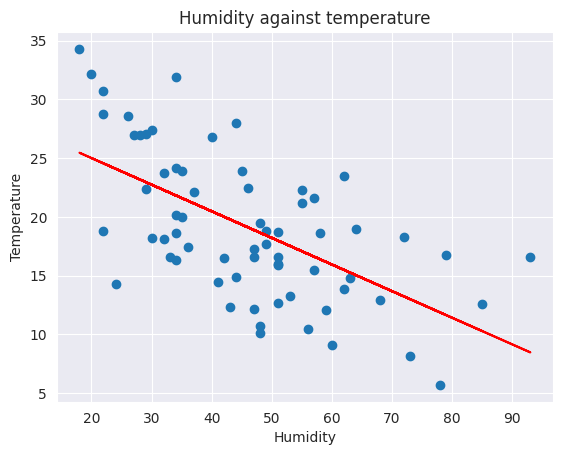

In [11]:
# Plot the prediction (the line) over the true value (the dots)
import seaborn as sns
sns.set_style("darkgrid")
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, 'r')
plt.title("Humidity against temperature")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

We can compare the error of our model by using some metrics like the **MAE (mean absolute error)**, **MSE (mean squared error)** or **R^2** score. Sklearn offers some nice modules to compute these measures. These modules are imported at the begining of the file.

These metrics takes the `y_test` values and the `predictions` as arguments. Basically it will analyse how far the prediction is from the true value. Using these metrics is very helpful when looking for the best model.

In [12]:
# Compare the MAE the MSE and the R^2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("MSE %.2f" % mse)
print("R^2 %.2f" % r2)

MAE 4.27
MSE 24.44
R^2 0.37


It is also interesting to compare the result of these metrics between the data from the `test set` and those from the `train set` as it enables you to see whether your model gives a good prediction or not.

In [13]:
pred = model.predict(X_train)
mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred)
r2 = r2_score(y_train, pred)

print("MAE %.2f" % mae)
print("MSE %.2f" % mse)
print("R^2 %.2f" % r2)

MAE 4.77
MSE 31.08
R^2 0.31


Remember, the higher the R² value, the better the fit. In this case, the testing data yields a higher coefficient. While it might seem a bit counterintuitive.
 Furthermore, the R² calculated with test data is an unbiased measure of your model’s prediction performance.

## 6. Multivariate Regression


Here, we will apply the same method to several features. For instance it should be interesting to use these variables: humidity, pressure, sunshine and cloud data to predict the temperature. We continue to work with values concerning 3pm for simplicity.

In [14]:
X = weather[['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']]
y = weather[['Temp3pm']]

### Split the data into a training set and a test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Fit the model

In [16]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R^2 Score of the model: ", round(model.score(X_test, y_test), 3))
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_)
print("Features coefficients (weigths): ", model.coef_)# Get the coefficients, w

R^2 Score of the model:  0.438
Intercept:  [361.96448369]
Features coefficients (weigths):  [[-0.20850482  0.53595273 -0.33294024  0.39432442]]


### Prediction
We use the predict() function to predict the values of the test set using X_test.
This prediction can be compared to the truth value i.e y_test.


In [17]:
print("Particular value of ['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']: ", X_test.iloc[0].values)
prediction = model.predict([[ 28.0, 7.0, 1018.2, 7.3]])
print("Prediction/Truth for [ 28.0, 7.0, 1018.2, 7.3]: ",prediction.flatten()[0],"but real value:" ,y_test.iloc[0].values.flatten()[0])

Particular value of ['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']:  [  28.     7.  1018.2    7.3]
Prediction/Truth for [ 28.0, 7.0, 1018.2, 7.3]:  23.756830125902297 but real value: 27.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Evaluation
Lastly, we use the MAE (mean absolute error), MSE (mean squared error) or R^2 score to analyse how far the prediction is from the true value.
These  metrics takes the `y_test` values and the `predictions` as arguments.

In [20]:
# for the test data
predictions = model.predict(X_test)

print("MAE %.2f" % mean_absolute_error(y_test, predictions))
print("MSE %.2f" % mean_squared_error(y_test, predictions))
print("R^2 %.2f" % r2_score(y_test, predictions))

MAE 3.90
MSE 21.85
R^2 0.44


In [21]:
# for the training data
predictions = model.predict(X_train)

print("MAE %.2f" % mean_absolute_error(y_train, predictions))
print("MSE %.2f" % mean_squared_error(y_train, predictions))
print("R^2 %.2f" % r2_score(y_train, predictions))

MAE 4.13
MSE 24.11
R^2 0.47


#### Feature Selection and Error Analysis in Linear Regression

Train error:  [11.02629934559219, 10.546349892010538, 7.945720705222089, 5.098494310131526]
Test error :  [10.906664493008066, 10.6643541285931, 7.555059569256484, 4.18355832174993]


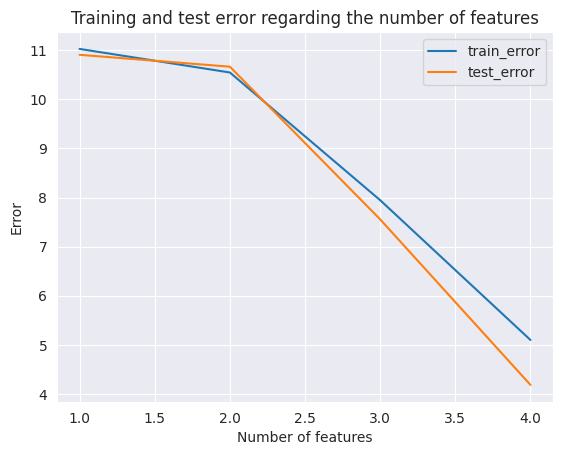

In [25]:
# Arrays to save the different errors
train_err = []
test_err = []

# Iterate over 1, 2, 3 and 4 features
for nbr_col in range(1, len(X.columns)+1):
    # Select the good number of features for X
    X_temp = X[X.columns[:nbr_col]]
    # Split the dat set
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=10)
    # Normalize the data
    # Create new scaler from MinMaxScaler()
    scaler = MinMaxScaler()
    # Fit and transform the original data
    scaler.fit(X_train, y_train)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Create the linear model
    LR = LinearRegression(fit_intercept=False)
    # Fit the linear model
    LR.fit(X_train, y_train)

    #Compute and save the mean absolute error fro training and testing set
    train_err.append(mean_absolute_error(y_train, LR.predict(X_train)))
    test_err.append(mean_absolute_error(y_test, LR.predict(X_test)))

# Print the train and the test errors
print("Train error: ", train_err)
print("Test error : ", test_err)

plt.title("Training and test error regarding the number of features")
plt.plot(range(1,len(X.columns)+1), train_err, label="train_error")
plt.plot(range(1,len(X.columns)+1), test_err, label="test_error")
plt.legend(fontsize=10)
plt.xlabel("Number of features")
plt.ylabel("Error")
plt.show()
